In [ ]:
pip install scikit-image opencv-python pywavelets tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 35.0 MB/s eta 0:00:00


              Method       PSNR      SSIM       MSE
0      Median Filter  23.641194  0.605099  0.004324
1  Wavelet Denoising  24.527393  0.623079  0.003526


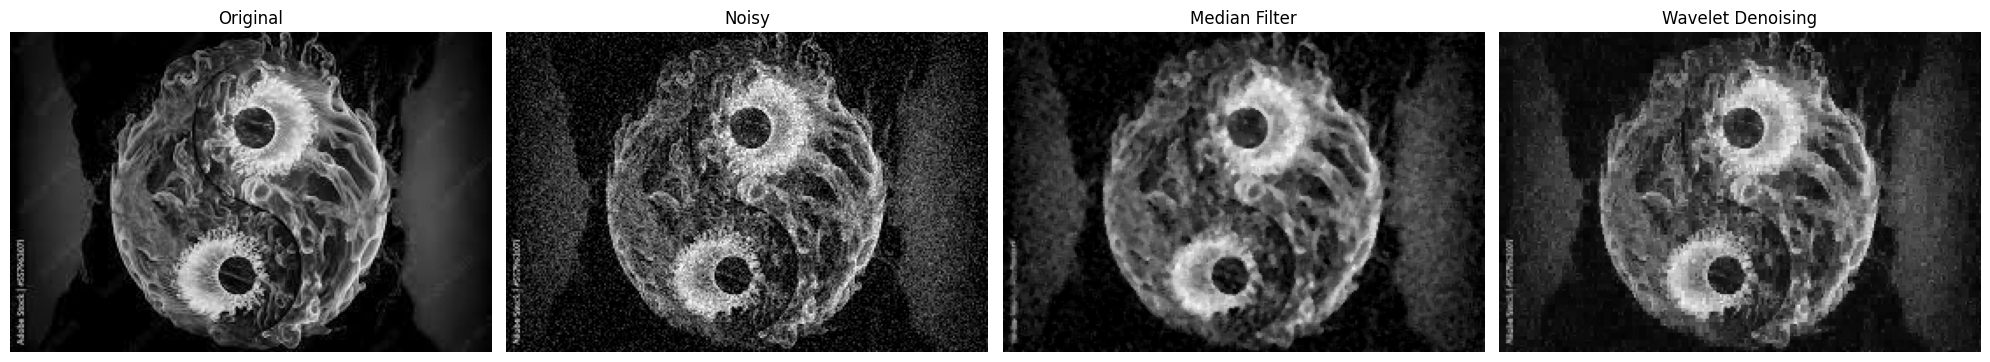

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import img_as_float
from skimage.metrics import peak_signal_noise_ratio as psnr, structural_similarity as ssim, mean_squared_error as mse
from skimage.restoration import denoise_wavelet
from skimage.util import random_noise
import pandas as pd

image_path = '/content/yin-yan.jpeg'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image = img_as_float(image)

# ==== Add Gaussian noise ====
noisy_image = random_noise(image, mode='gaussian', var=0.01)

# ==== Apply Denoising Techniques ====
# 1. Median Filter
median_denoised = cv2.medianBlur((noisy_image * 255).astype(np.uint8), 3) / 255.0

# 2. Wavelet Denoising
wavelet_denoised = denoise_wavelet(noisy_image, channel_axis=None, rescale_sigma=True)

# ==== Evaluation Metrics ====
def evaluate(original, denoised, name):
    return {
        "Method": name,
        "PSNR": psnr(original, denoised, data_range=1.0),
        "SSIM": ssim(original, denoised, data_range=1.0),
        "MSE": mse(original, denoised)
    }

results = [
    evaluate(image, median_denoised, "Median Filter"),
    evaluate(image, wavelet_denoised, "Wavelet Denoising")
]

# ==== Show Metric Table ====
df = pd.DataFrame(results)
print(df)

# ==== Show Images ====
def show_images(imgs, titles):
    plt.figure(figsize=(20, 4))
    for i, (img, title) in enumerate(zip(imgs, titles)):
        plt.subplot(1, len(imgs), i + 1)
        plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

show_images(
    [image, noisy_image, median_denoised, wavelet_denoised],
    ['Original', 'Noisy', 'Median Filter', 'Wavelet Denoising']
)

In [ ]:
import cv2
import os
import numpy as np

# ==== Setup ====
video_path = '/content/cat 1.mp4'
output_dir = 'frames'
os.makedirs(output_dir, exist_ok=True)

# Output video setup
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
fps = 20  # change if needed
width, height = None, None

# Video capture
cap = cv2.VideoCapture(video_path)
frame_count = 0

# Writers for new processed videos
writers = {}

def init_writers(w, h):
    names = ['adaptive_thresh', 'gaussian', 'canny', 'bitwise_not']
    for name in names:
        writers[name] = cv2.VideoWriter(f'{name}_video.mp4', fourcc, fps, (w, h), isColor=False)

# ==== Processing Frames ====
collage_frames = []
while True:
    ret, frame = cap.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    if width is None:
        height, width = gray.shape
        init_writers(width, height)

    # Save frame
    cv2.imwrite(f"{output_dir}/frame_{frame_count:04d}.jpg", gray)

    # Adaptive Threshold
    adaptive = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                     cv2.THRESH_BINARY, 11, 2)

    # Gaussian Blur
    gaussian = cv2.GaussianBlur(gray, (5, 5), 0)

    # Canny Edge
    canny = cv2.Canny(gray, 50, 150)

    # Bitwise Not
    bitwise = cv2.bitwise_not(gray)

    # Write each processed frame to its video
    writers['adaptive_thresh'].write(adaptive)
    writers['gaussian'].write(gaussian)
    writers['canny'].write(canny)
    writers['bitwise_not'].write(bitwise)

    # Save some frames for collage
    if frame_count % 30 == 0 and len(collage_frames) < 6:
        collage_frames.append(cv2.resize(gray, (160, 120)))

    frame_count += 1

cap.release()
for w in writers.values():
    w.release()

# ==== Create Collage ====
if collage_frames:
    collage = np.hstack(collage_frames[:3])
    if len(collage_frames) > 3:
        collage2 = np.hstack(collage_frames[3:])
        collage = np.vstack((collage, collage2))
    cv2.imwrite("collage.jpg", collage)

print("✅ Done! Frames saved, videos processed, collage made.")

✅ Done! Frames saved, videos processed, collage made.


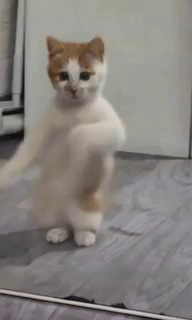

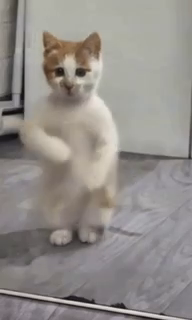

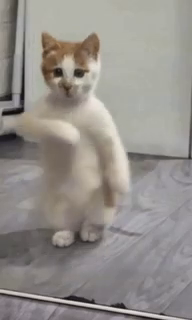

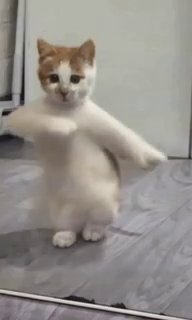

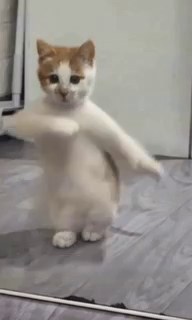

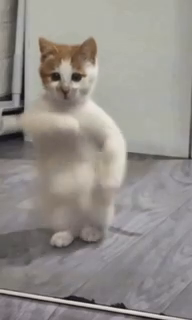

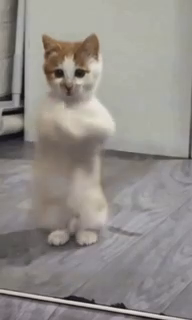

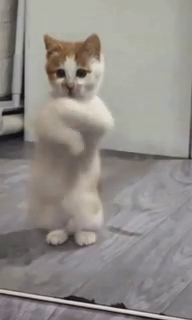

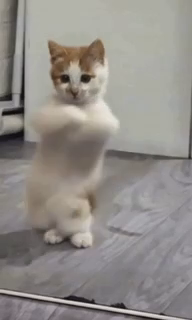

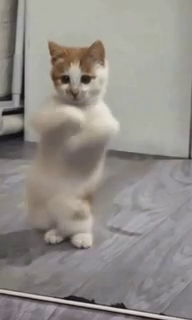

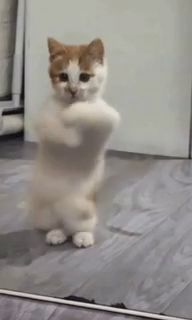

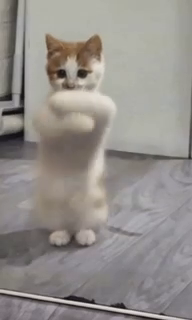

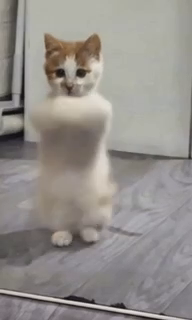

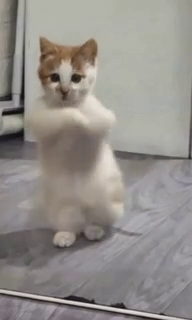

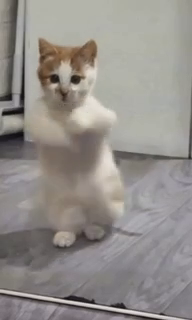

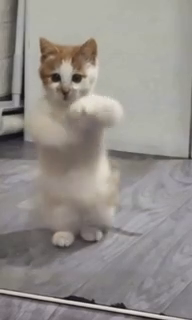

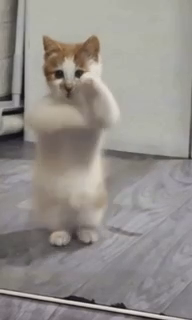

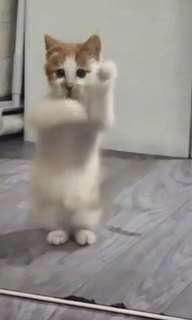

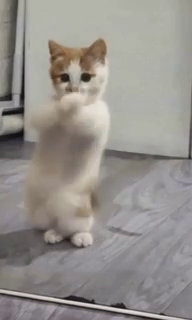

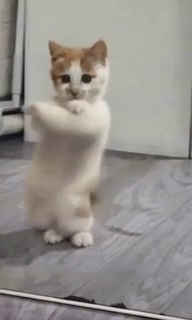

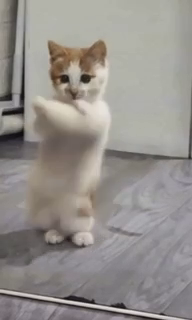

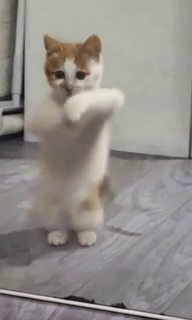

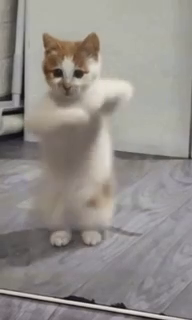

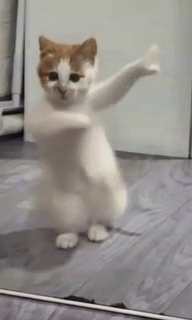

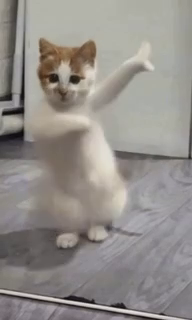

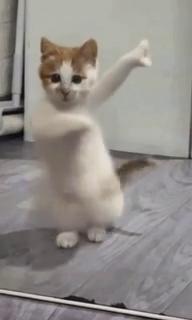

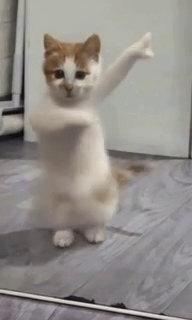

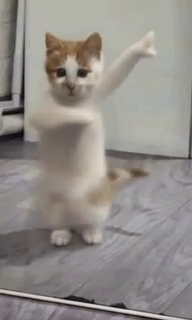

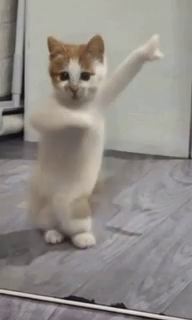

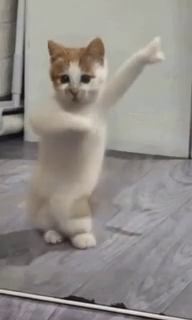

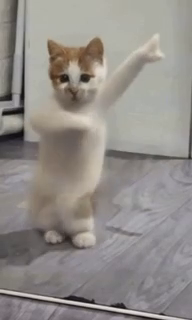

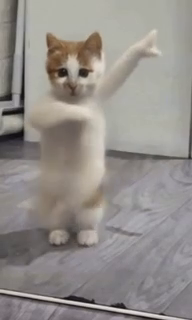

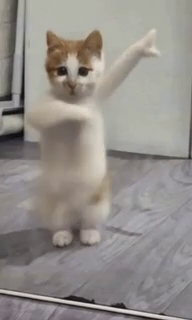

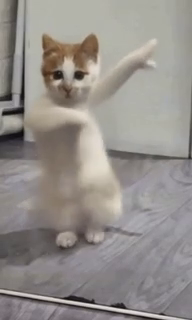

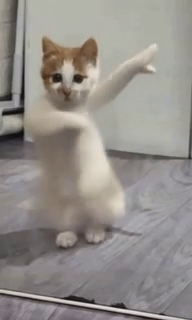

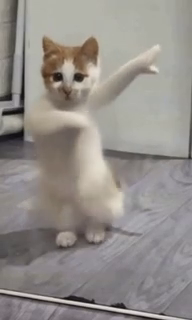

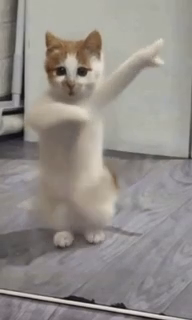

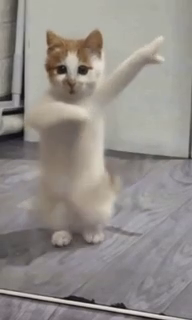

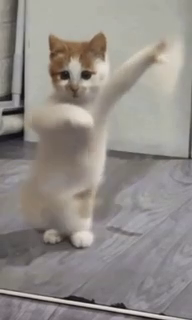

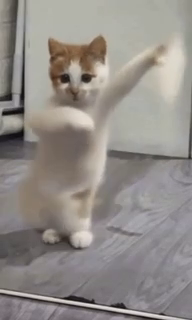

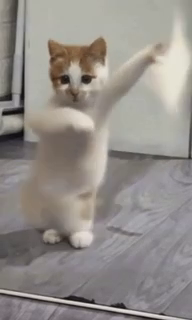

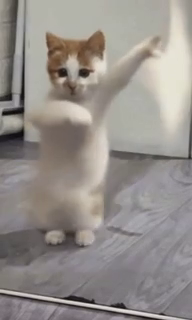

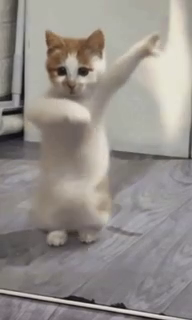

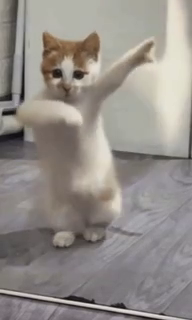

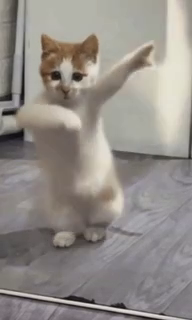

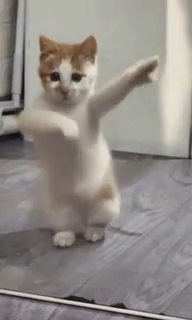

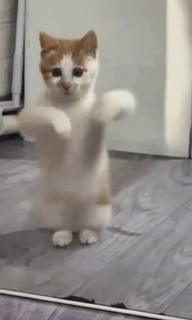

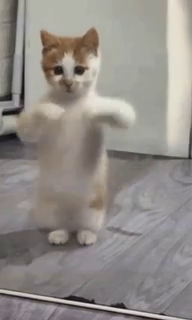

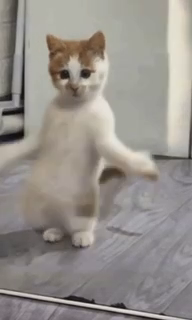

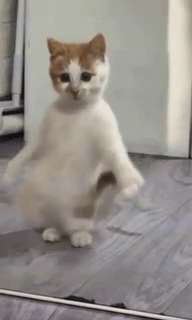

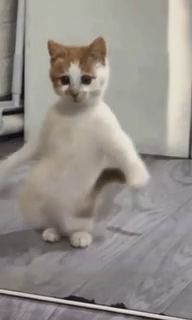

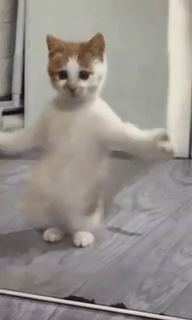

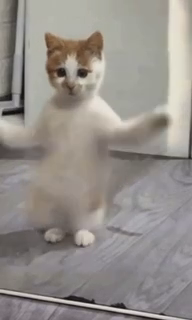

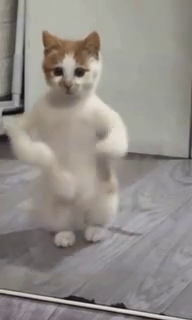

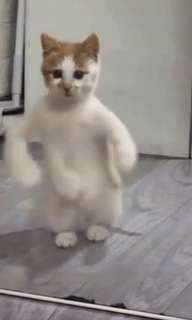

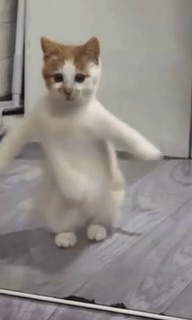

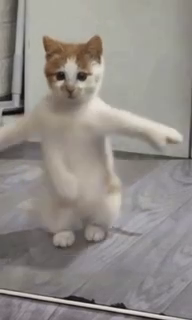

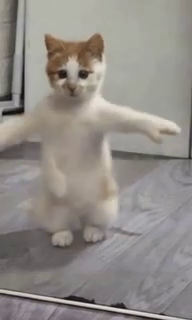

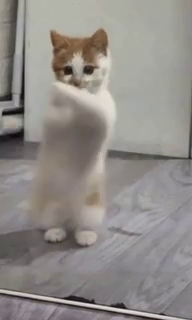

Frames extracted: 59


In [ ]:
import cv2
import os
from google.colab.patches import cv2_imshow

# ==== Video path ====
video_path = '/content/cat 1.mp4'

# ==== Create output folder ====
output_folder = 'extracted_frames'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# ==== Open video using OpenCV ====
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Couldn't open video.")
    exit()

frame_count = 0

while True:
    ret, frame = cap.read()  # Read a frame from the video
    if not ret:
        break  # Exit loop when no frames are left

    # Save frame as an image
    frame_filename = os.path.join(output_folder, f'frame_{frame_count:04d}.jpg')
    cv2.imwrite(frame_filename, frame)

    # Display the frame (optional)
    cv2_imshow(frame)

    # Break the loop if 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    frame_count += 1

# Clean up and release resources
cap.release()
cv2.destroyAllWindows()

print(f"Frames extracted: {frame_count}")

In [ ]:
import cv2
import numpy as np
import os
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# ==== Video path ====
video_path = '/content/cat 1.mp4'  # Replace with your video path

# ==== Create output folder ====
output_folder = 'processed_frames'
if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Create a VideoWriter to save the new video
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # Codec for output video
output_video = cv2.VideoWriter('output_video.mp4', fourcc, 30.0, (640, 480))  # 30 FPS, 640x480 resolution

# Open the video file
cap = cv2.VideoCapture(video_path)

# Check if video opened successfully
if not cap.isOpened():
    print("Error: Couldn't open video. Please check the video path.")
    exit()

frame_count = 0
frames_for_collage = []  # Store frames for collage

while True:
    ret, frame = cap.read()
    if not ret:
        break  # Exit loop when no frames are left

    # Resize frame (optional, to standardize size)
    frame = cv2.resize(frame, (640, 480))

    # 1. Adaptive Thresholding (Grayscale)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    adaptive_thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

    # 2. Gaussian Smoothing
    gaussian_smooth = cv2.GaussianBlur(frame, (5, 5), 0)

    # 3. Canny Edge Detection
    canny_edges = cv2.Canny(gray, 100, 200)

    # 4. Bitwise NOT operation
    bitwise_not = cv2.bitwise_not(frame)

    # === Show each transformation (visualize each step) ===
    cv2_imshow(frame)  # Use cv2_imshow instead of cv2.imshow in Colab
    cv2_imshow(adaptive_thresh)
    cv2_imshow(gaussian_smooth)
    cv2_imshow(canny_edges)
    cv2_imshow(bitwise_not)

    # Save frames for video creation (e.g., Gaussian Smoothing)
    output_video.write(gaussian_smooth)

    # Store frames for Collage (Every 10th frame)
    if frame_count % 10 == 0:
        frames_for_collage.append(frame)

    frame_count += 1

    # Stop video by pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Check if frames were collected for the collage
if len(frames_for_collage) > 0:
    # Create a collage from the selected frames
    # Resize frames to a consistent size before stacking
    frame_height = frames_for_collage[0].shape[0]  # Get height of first frame
    frame_width = frames_for_collage[0].shape[1]  # Get width of first frame
    resized_frames = [cv2.resize(frame, (frame_width, frame_height)) for frame in frames_for_collage]

    # Stack the resized frames
    collage = np.hstack([np.vstack(resized_frames[i:i+5]) for i in range(0, len(resized_frames), 5)])

    # Save collage image
    cv2.imwrite('collage.jpg', collage)
    print("Collage created and saved as 'collage.jpg'.")
else:
    print("No frames collected for collage.")

# Clean up and release resources
cap.release()
output_video.release()
cv2.destroyAllWindows()

print(f"Processed video frames: {frame_count}")

TASK-2

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pevogam/ucf101")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/ucf101


In [ ]:
import shutil

# Move the extracted dataset to /content
shutil.copytree('/kaggle/input/ucf101', '/content/UCF101')

FileExistsError: [Errno 17] File exists: '/content/UCF101'

In [ ]:
import os
import cv2
import numpy as np
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, Dense


In [ ]:
DATASET_PATH = '/content//UCF101/UCF101/UCF-101/'  # path where UCF101 extracted
selected_classes = ['Basketball', 'Typing', 'GolfSwing', 'WalkingWithDog', 'PlayingGuitar']
frames_per_video = 16
img_height, img_width = 112, 112

def load_ucf101_data(dataset_path, selected_classes, frames=16):
    X = []
    y = []

    for class_name in selected_classes:
        class_path = os.path.join(dataset_path, class_name)
        video_files = os.listdir(class_path)

        for video_file in video_files:
            video_path = os.path.join(class_path, video_file)
            frames_list = []

            cap = cv2.VideoCapture(video_path)
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

            if total_frames < frames:
                continue  # skip videos with too few frames

            frame_indices = np.linspace(0, total_frames-1, frames, dtype=int)

            for idx in frame_indices:
                cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
                ret, frame = cap.read()
                if ret:
                    frame = cv2.resize(frame, (img_width, img_height))
                    frame = frame / 255.0
                    frames_list.append(frame)
                else:
                    break

            cap.release()

            if len(frames_list) == frames:
                X.append(frames_list)
                y.append(class_name)

    return np.array(X), np.array(y)

# Load dataset
X, y = load_ucf101_data(DATASET_PATH, selected_classes, frames=frames_per_video)

print("Data loaded:", X.shape, y.shape)

Data loaded: (666, 16, 112, 112, 3) (666,)


In [ ]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode
y_encoded = tf.keras.utils.to_categorical(y_encoded)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

print("Train:", X_train.shape, y_train.shape)
print("Test:", X_test.shape, y_test.shape)

num_classes = len(selected_classes)

Train: (532, 16, 112, 112, 3) (532, 5)
Test: (134, 16, 112, 112, 3) (134, 5)


In [ ]:
# Define model
model = Sequential([
    Conv3D(32, (3,3,3), activation='relu', padding='same', input_shape=(frames_per_video, img_height, img_width, 3)),
    MaxPooling3D((2,2,2)),

    Conv3D(64, (3,3,3), activation='relu', padding='same'),
    MaxPooling3D((2,2,2)),

    Conv3D(128, (3,3,3), activation='relu', padding='same'),
    GlobalAveragePooling3D(),

    Dense(256, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv3d (Conv3D)                 │ (None, 16, 112, 112,   │         2,624 │
│                                 │ 32)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d (MaxPooling3D)    │ (None, 8, 56, 56, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_1 (Conv3D)               │ (None, 8, 56, 56, 64)  │        55,360 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_1 (MaxPooling3D)  │ (None, 4, 28, 28, 64)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3d_2 (Conv3D)               │ (None, 4, 28, 28, 128) │       221,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling3d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling3D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 313,605 (1.20 MB)

 Trainable params: 313,605 (1.20 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.arange(num_classes), y=np.argmax(y_train, axis=1))
class_weights = dict(enumerate(class_weights))

print("Class weights:", class_weights)


Class weights: {0: np.float64(1.064), 1: np.float64(1.0431372549019609), 2: np.float64(0.83125), 3: np.float64(0.9761467889908257), 4: np.float64(1.1440860215053763)}


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=8,
    class_weight=class_weights
)


Epoch 1/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 19s 168ms/step - accuracy: 0.1999 - loss: 1.6064 - val_accuracy: 0.3731 - val_loss: 1.5817
Epoch 2/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - accuracy: 0.3347 - loss: 1.5359 - val_accuracy: 0.4104 - val_loss: 1.2880
Epoch 3/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.4273 - loss: 1.3233 - val_accuracy: 0.4925 - val_loss: 1.1360
Epoch 4/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.5461 - loss: 1.1045 - val_accuracy: 0.5597 - val_loss: 1.0717
Epoch 5/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.5191 - loss: 1.0727 - val_accuracy: 0.5224 - val_loss: 1.0737
Epoch 6/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 75ms/step - accuracy: 0.5894 - loss: 0.9092 - val_accuracy: 0.5299 - val_loss: 0.9585
Epoch 7/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - accuracy: 0.6840 - loss: 0.7697 - val_accuracy: 0.6343 - val_loss: 0.8375
Epoch 8/20
67/67 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.7254 - loss: 0.7454 - val_accuracy: 0.

In [ ]:
# Evaluate on test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Classification report
print("\nClassification Report:")
print(classification_report(y_true_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true_classes, y_pred_classes))

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 81ms/step - accuracy: 0.8126 - loss: 0.4496
Test Loss: 0.4139, Test Accuracy: 0.8284
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step

Classification Report:
                precision    recall  f1-score   support

    Basketball       0.88      0.56      0.68        25
     GolfSwing       0.79      1.00      0.88        26
 PlayingGuitar       1.00      0.75      0.86        32
        Typing       0.77      1.00      0.87        27
WalkingWithDog       0.77      0.83      0.80        24

      accuracy                           0.83       134
     macro avg       0.84      0.83      0.82       134
  weighted avg       0.85      0.83      0.82       134


Confusion Matrix:
[[14  5  0  0  6]
 [ 0 26  0  0  0]
 [ 1  0 24  7  0]
 [ 0  0  0 27  0]
 [ 1  2  0  1 20]]
